In [11]:
import keras
import numpy as np
import scipy.io
from pathlib import Path
import os
from glob import glob
from skimage import data, io, feature, color, exposure
import numpy as np
import cv2

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

## Open labels

In [2]:
path = 'C:\\Users\\Rodolfo\\Documents\\algoritmos-git\\custom_cnn\\Data\\Processados\\'

In [3]:
y_train = np.load(Path(path,'y_train.npy'))
y_test = np.load(Path(path, 'y_test.npy'))
y_train = np.expand_dims(y_train, axis=1)
y_test = np.expand_dims(y_test, axis=1)

In [4]:
from keras.utils import np_utils
# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [6]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

# Open data

In [7]:
path = Path(path, '28_28')
X_train_1 = np.load(Path(path, 'X_train_1.npy'))
X_train_2 = np.load(Path(path, 'X_train_2.npy'))
X_test_1 = np.load(Path(path, 'X_test_1.npy'))
X_test_2 = np.load(Path(path, 'X_test_2.npy'))
print(X_train_1.shape)
print(X_train_2.shape)
print(X_test_1.shape)
print(X_test_2.shape)

(2200, 28, 28)
(2200, 28, 28)
(1000, 28, 28)
(1000, 28, 28)


In [16]:
# Empilhei uma imagem abaixo da outra
X_train_ = np.append(X_train_1, X_train_2, axis=1)
X_train_.shape

(2200, 56, 28)

In [17]:
# Empilhei uma imagem abaixo da outra
X_test_ = np.append(X_test_1, X_test_2, axis=1)
X_test_.shape

(1000, 56, 28)

In [12]:
def plt_img(img_matrix, title='Image', normalize=False):
    if normalize:
        plt.imshow(img_matrix, vmin=np.min(img_matrix), vmax=np.max(img_matrix), cmap='gray')
    else:
        io.imshow(img_matrix)
    plt.title(title)
    plt.show()

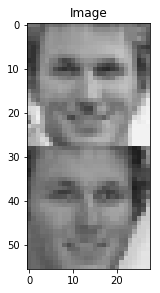

In [18]:
plt_img(X_train_[0]) # train: instance 1: path_pair_id_1_cropped and path_pair_id_2_cropped

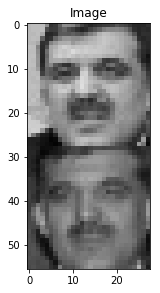

In [19]:
plt_img(X_test_[0]) # test: instance 1: path_pair_id_1_cropped and path_pair_id_2_cropped

### Shape desejado: x_train shape: (45000, 32, 32, 3) -> n_obs, n_row, n_col, n_chan

In [20]:
n_obs, n_row, n_col = X_train_.shape
n_chan=1
X_train = np.zeros((n_obs, n_row, n_col, n_chan))
X_train.shape

(2200, 56, 28, 1)

In [21]:
X_train[:,:,:,0]=X_train_
X_train.shape

(2200, 56, 28, 1)

In [37]:
X_train[:,:,:,0].shape

(2200, 56, 28)

In [22]:
n_obs, n_row, n_col = X_test_.shape
n_chan=1
X_test = np.zeros((n_obs, n_row, n_col, n_chan))
X_test.shape

(1000, 56, 28, 1)

In [23]:
X_test[:,:,:,0]=X_test_
X_test.shape

(1000, 56, 28, 1)

In [25]:
X_test[:,:,:,0].shape

(1000, 56, 28)

# Shuffle X_train

In [38]:
arr = np.arange(y_train.shape[0])
np.random.shuffle(arr)
X_train = X_train[arr,:,:,:]
y_train = y_train[arr]

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [39]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [40]:
# break training set into training and validation sets
(X_train, X_valid) = X_train[:1800], X_train[1800:]
(y_train, y_valid) = y_train[:1800], y_train[1800:]

# print shape of training set
print('x_train shape:', X_train.shape)

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_valid.shape[0], 'validation samples')

x_train shape: (1800, 56, 28, 1)
1800 train samples
1000 test samples
400 validation samples


### 5. Define the Model Architecture 

In [41]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', strides=(1,1), input_shape=(56, 28, 1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', strides=(2,2)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', strides=(1,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 56, 28, 16)        80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 7, 32)         2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 3, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 3, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 1, 64)          0         
______________________

### 6. Compile the Model 

In [42]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 7. Train the Model 

In [46]:
from keras.callbacks import ModelCheckpoint   

# train the model
model_path = 'model_2.weights.best.hdf5'
checkpointer = ModelCheckpoint(filepath=model_path, verbose=1, 
                               save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=32, epochs=500,
          validation_data=(X_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 1800 samples, validate on 400 samples
Epoch 1/500
 - 1s - loss: 0.6614 - acc: 0.5972 - val_loss: 0.7368 - val_acc: 0.4950

Epoch 00001: val_loss improved from inf to 0.73682, saving model to model_2.weights.best.hdf5
Epoch 2/500
 - 1s - loss: 0.6575 - acc: 0.6017 - val_loss: 0.7016 - val_acc: 0.5175

Epoch 00002: val_loss improved from 0.73682 to 0.70163, saving model to model_2.weights.best.hdf5
Epoch 3/500
 - 1s - loss: 0.6453 - acc: 0.6067 - val_loss: 0.7247 - val_acc: 0.5075

Epoch 00003: val_loss did not improve from 0.70163
Epoch 4/500
 - 1s - loss: 0.6455 - acc: 0.6211 - val_loss: 0.7233 - val_acc: 0.5075

Epoch 00004: val_loss did not improve from 0.70163
Epoch 5/500
 - 1s - loss: 0.6365 - acc: 0.6272 - val_loss: 0.7015 - val_acc: 0.5325

Epoch 00005: val_loss improved from 0.70163 to 0.70154, saving model to model_2.weights.best.hdf5
Epoch 6/500
 - 1s - loss: 0.6215 - acc: 0.6428 - val_loss: 0.7314 - val_acc: 0.5200

Epoch 00006: val_loss did not improve from 0.70154



Epoch 00059: val_loss did not improve from 0.70154
Epoch 60/500
 - 2s - loss: 0.2351 - acc: 0.8994 - val_loss: 1.3428 - val_acc: 0.5600

Epoch 00060: val_loss did not improve from 0.70154
Epoch 61/500
 - 2s - loss: 0.2262 - acc: 0.9033 - val_loss: 1.3430 - val_acc: 0.5775

Epoch 00061: val_loss did not improve from 0.70154
Epoch 62/500
 - 2s - loss: 0.2083 - acc: 0.9161 - val_loss: 1.6493 - val_acc: 0.5575

Epoch 00062: val_loss did not improve from 0.70154
Epoch 63/500
 - 2s - loss: 0.2095 - acc: 0.9128 - val_loss: 1.5815 - val_acc: 0.5375

Epoch 00063: val_loss did not improve from 0.70154
Epoch 64/500
 - 2s - loss: 0.2289 - acc: 0.9011 - val_loss: 1.5175 - val_acc: 0.5700

Epoch 00064: val_loss did not improve from 0.70154
Epoch 65/500
 - 2s - loss: 0.2281 - acc: 0.9033 - val_loss: 1.3923 - val_acc: 0.5575

Epoch 00065: val_loss did not improve from 0.70154
Epoch 66/500
 - 2s - loss: 0.2080 - acc: 0.9183 - val_loss: 1.5019 - val_acc: 0.5575

Epoch 00066: val_loss did not improve fr


Epoch 00119: val_loss did not improve from 0.70154
Epoch 120/500
 - 2s - loss: 0.1269 - acc: 0.9550 - val_loss: 2.1947 - val_acc: 0.5500

Epoch 00120: val_loss did not improve from 0.70154
Epoch 121/500
 - 2s - loss: 0.1396 - acc: 0.9444 - val_loss: 1.8718 - val_acc: 0.5925

Epoch 00121: val_loss did not improve from 0.70154
Epoch 122/500
 - 2s - loss: 0.1443 - acc: 0.9550 - val_loss: 2.0730 - val_acc: 0.5625

Epoch 00122: val_loss did not improve from 0.70154
Epoch 123/500
 - 2s - loss: 0.1510 - acc: 0.9406 - val_loss: 1.8933 - val_acc: 0.5500

Epoch 00123: val_loss did not improve from 0.70154
Epoch 124/500
 - 2s - loss: 0.1008 - acc: 0.9644 - val_loss: 2.0910 - val_acc: 0.6075

Epoch 00124: val_loss did not improve from 0.70154
Epoch 125/500
 - 2s - loss: 0.1335 - acc: 0.9528 - val_loss: 2.2335 - val_acc: 0.5625

Epoch 00125: val_loss did not improve from 0.70154
Epoch 126/500
 - 2s - loss: 0.1194 - acc: 0.9544 - val_loss: 2.2127 - val_acc: 0.5475

Epoch 00126: val_loss did not imp

 - 2s - loss: 0.1068 - acc: 0.9628 - val_loss: 2.4070 - val_acc: 0.5650

Epoch 00179: val_loss did not improve from 0.70154
Epoch 180/500
 - 2s - loss: 0.0935 - acc: 0.9633 - val_loss: 2.4971 - val_acc: 0.5375

Epoch 00180: val_loss did not improve from 0.70154
Epoch 181/500
 - 2s - loss: 0.1053 - acc: 0.9661 - val_loss: 2.3933 - val_acc: 0.5600

Epoch 00181: val_loss did not improve from 0.70154
Epoch 182/500
 - 2s - loss: 0.1129 - acc: 0.9556 - val_loss: 2.4540 - val_acc: 0.5600

Epoch 00182: val_loss did not improve from 0.70154
Epoch 183/500
 - 2s - loss: 0.0984 - acc: 0.9622 - val_loss: 2.5432 - val_acc: 0.5525

Epoch 00183: val_loss did not improve from 0.70154
Epoch 184/500
 - 2s - loss: 0.1083 - acc: 0.9644 - val_loss: 2.2738 - val_acc: 0.5450

Epoch 00184: val_loss did not improve from 0.70154
Epoch 185/500
 - 2s - loss: 0.1065 - acc: 0.9628 - val_loss: 2.4798 - val_acc: 0.5575

Epoch 00185: val_loss did not improve from 0.70154
Epoch 186/500
 - 2s - loss: 0.0915 - acc: 0.9644


Epoch 00238: val_loss did not improve from 0.70154
Epoch 239/500
 - 2s - loss: 0.0868 - acc: 0.9672 - val_loss: 2.5753 - val_acc: 0.5675

Epoch 00239: val_loss did not improve from 0.70154
Epoch 240/500
 - 2s - loss: 0.0940 - acc: 0.9683 - val_loss: 2.4705 - val_acc: 0.5675

Epoch 00240: val_loss did not improve from 0.70154
Epoch 241/500
 - 2s - loss: 0.1009 - acc: 0.9639 - val_loss: 2.4623 - val_acc: 0.5625

Epoch 00241: val_loss did not improve from 0.70154
Epoch 242/500
 - 2s - loss: 0.0945 - acc: 0.9633 - val_loss: 2.2001 - val_acc: 0.5550

Epoch 00242: val_loss did not improve from 0.70154
Epoch 243/500
 - 2s - loss: 0.0763 - acc: 0.9711 - val_loss: 2.4307 - val_acc: 0.5850

Epoch 00243: val_loss did not improve from 0.70154
Epoch 244/500
 - 2s - loss: 0.0906 - acc: 0.9694 - val_loss: 2.2233 - val_acc: 0.5500

Epoch 00244: val_loss did not improve from 0.70154
Epoch 245/500
 - 2s - loss: 0.0839 - acc: 0.9678 - val_loss: 2.4492 - val_acc: 0.5500

Epoch 00245: val_loss did not imp

 - 2s - loss: 0.0852 - acc: 0.9706 - val_loss: 2.5987 - val_acc: 0.5550

Epoch 00298: val_loss did not improve from 0.70154
Epoch 299/500
 - 2s - loss: 0.0821 - acc: 0.9739 - val_loss: 2.5733 - val_acc: 0.5750

Epoch 00299: val_loss did not improve from 0.70154
Epoch 300/500
 - 2s - loss: 0.0565 - acc: 0.9789 - val_loss: 2.9041 - val_acc: 0.5675

Epoch 00300: val_loss did not improve from 0.70154
Epoch 301/500
 - 2s - loss: 0.0729 - acc: 0.9756 - val_loss: 2.6446 - val_acc: 0.5600

Epoch 00301: val_loss did not improve from 0.70154
Epoch 302/500
 - 3s - loss: 0.0687 - acc: 0.9778 - val_loss: 3.2420 - val_acc: 0.5625

Epoch 00302: val_loss did not improve from 0.70154
Epoch 303/500
 - 2s - loss: 0.0758 - acc: 0.9756 - val_loss: 2.5421 - val_acc: 0.5650

Epoch 00303: val_loss did not improve from 0.70154
Epoch 304/500
 - 2s - loss: 0.0956 - acc: 0.9672 - val_loss: 2.4415 - val_acc: 0.5600

Epoch 00304: val_loss did not improve from 0.70154
Epoch 305/500
 - 3s - loss: 0.0835 - acc: 0.9700


Epoch 00357: val_loss did not improve from 0.70154
Epoch 358/500
 - 2s - loss: 0.0737 - acc: 0.9744 - val_loss: 2.7734 - val_acc: 0.5375

Epoch 00358: val_loss did not improve from 0.70154
Epoch 359/500
 - 2s - loss: 0.0679 - acc: 0.9756 - val_loss: 2.8760 - val_acc: 0.5575

Epoch 00359: val_loss did not improve from 0.70154
Epoch 360/500
 - 2s - loss: 0.0593 - acc: 0.9800 - val_loss: 3.0216 - val_acc: 0.5250

Epoch 00360: val_loss did not improve from 0.70154
Epoch 361/500
 - 2s - loss: 0.0691 - acc: 0.9767 - val_loss: 2.8132 - val_acc: 0.5450

Epoch 00361: val_loss did not improve from 0.70154
Epoch 362/500
 - 2s - loss: 0.0952 - acc: 0.9700 - val_loss: 2.9921 - val_acc: 0.5675

Epoch 00362: val_loss did not improve from 0.70154
Epoch 363/500
 - 2s - loss: 0.0706 - acc: 0.9744 - val_loss: 2.5307 - val_acc: 0.5725

Epoch 00363: val_loss did not improve from 0.70154
Epoch 364/500
 - 2s - loss: 0.0648 - acc: 0.9794 - val_loss: 3.1202 - val_acc: 0.5500

Epoch 00364: val_loss did not imp

 - 2s - loss: 0.0708 - acc: 0.9744 - val_loss: 2.7285 - val_acc: 0.5575

Epoch 00417: val_loss did not improve from 0.70154
Epoch 418/500
 - 2s - loss: 0.0589 - acc: 0.9822 - val_loss: 2.5986 - val_acc: 0.5600

Epoch 00418: val_loss did not improve from 0.70154
Epoch 419/500
 - 2s - loss: 0.0531 - acc: 0.9828 - val_loss: 3.1270 - val_acc: 0.5625

Epoch 00419: val_loss did not improve from 0.70154
Epoch 420/500
 - 2s - loss: 0.1006 - acc: 0.9661 - val_loss: 2.8468 - val_acc: 0.5450

Epoch 00420: val_loss did not improve from 0.70154
Epoch 421/500
 - 2s - loss: 0.0717 - acc: 0.9767 - val_loss: 2.8490 - val_acc: 0.5625

Epoch 00421: val_loss did not improve from 0.70154
Epoch 422/500
 - 2s - loss: 0.0730 - acc: 0.9772 - val_loss: 2.6014 - val_acc: 0.5525

Epoch 00422: val_loss did not improve from 0.70154
Epoch 423/500
 - 2s - loss: 0.0600 - acc: 0.9783 - val_loss: 3.0044 - val_acc: 0.5500

Epoch 00423: val_loss did not improve from 0.70154
Epoch 424/500
 - 2s - loss: 0.0741 - acc: 0.9761


Epoch 00476: val_loss did not improve from 0.70154
Epoch 477/500
 - 2s - loss: 0.0477 - acc: 0.9861 - val_loss: 2.8701 - val_acc: 0.5525

Epoch 00477: val_loss did not improve from 0.70154
Epoch 478/500
 - 2s - loss: 0.0761 - acc: 0.9767 - val_loss: 2.8247 - val_acc: 0.5600

Epoch 00478: val_loss did not improve from 0.70154
Epoch 479/500
 - 2s - loss: 0.0674 - acc: 0.9811 - val_loss: 2.9760 - val_acc: 0.5600

Epoch 00479: val_loss did not improve from 0.70154
Epoch 480/500
 - 2s - loss: 0.0624 - acc: 0.9778 - val_loss: 2.9809 - val_acc: 0.5350

Epoch 00480: val_loss did not improve from 0.70154
Epoch 481/500
 - 2s - loss: 0.0629 - acc: 0.9783 - val_loss: 2.8542 - val_acc: 0.5550

Epoch 00481: val_loss did not improve from 0.70154
Epoch 482/500
 - 2s - loss: 0.0502 - acc: 0.9833 - val_loss: 2.8067 - val_acc: 0.5550

Epoch 00482: val_loss did not improve from 0.70154
Epoch 483/500
 - 2s - loss: 0.0752 - acc: 0.9750 - val_loss: 2.8837 - val_acc: 0.5650

Epoch 00483: val_loss did not imp

### 8. Load the Model with the Best Validation Accuracy

In [48]:
# load the weights that yielded the best validation accuracy
model.load_weights(model_path)

### 9. Calculate Classification Accuracy on Test Set

In [49]:
# evaluate and print test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.537
